<a href="https://colab.research.google.com/github/AjayAgAI/A-to-Z-Resources-for-Students/blob/master/Basic_Prophet_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dataset of Female Births **

In [37]:
import pandas as pd

series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv', index_col=0, header=0)
series.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [28]:
#Printing first few rows using Head Function
print(series.head())
#Printing Dimensions of the Dataset using Size Function  
print('\n',' The size of the Dataset is ', series.size)
#Query the data using date-time string
#series['1959-12']
#Print Summary Statistics of the Data
print('\n', 'The Summary statistics of the Dataset is \n', series.describe())

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

  The size of the Dataset is  365

 The Summary statistics of the Dataset is 
            Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


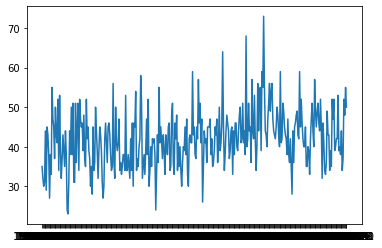

In [30]:
#Importing Matplotlib for Plotting purpose
from matplotlib import pyplot
#Plotting Time Series Data
pyplot.plot(series)
pyplot.show()

In [0]:
#Using Facebook Prophet Library
from fbprophet import Prophet
#Creating a New DataFrame for Facebook Prophet having values of timestamps and number of births mentioned in the previous 'series' dataframe
#Import was done again as earlier header=0, and index_col=0
newseries = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv')
newdata=newseries[['Date','Births']]
#Converting Column Names to 'ds' and 'y' respectively
newdata.columns=['ds','y']
#Prophet requires 'ds' column values to be timestamps
newdata.ds=pd.to_datetime(newdata.ds)

In [40]:
newdata.tail()

,ds,y
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [42]:
#Starting Prophet
m=Prophet()
m.fit(newdata)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
#Creating a dataframe for next 1 year havig corresponding TimeStamps
#HoneySingh being sung at 23:34 at IIIT Hyderabad (plus filles et gens)
future=m.make_future_dataframe(periods=365)
future.tail()


,ds
725,1960-12-26
726,1960-12-27
727,1960-12-28
728,1960-12-29
729,1960-12-30


In [48]:
#Predicting the Future
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
725,1960-12-26,46.838265,37.352154,54.298211,45.616708,48.137111,-0.853593,-0.853593,-0.853593,-0.853593,-0.853593,-0.853593,0.0,0.0,0.0,45.984672
726,1960-12-27,46.844389,39.740306,57.252774,45.618655,48.146608,1.743618,1.743618,1.743618,1.743618,1.743618,1.743618,0.0,0.0,0.0,48.588008
727,1960-12-28,46.850514,40.405380,57.881367,45.620701,48.156105,1.822115,1.822115,1.822115,1.822115,1.822115,1.822115,0.0,0.0,0.0,48.672629
728,1960-12-29,46.856638,38.808815,56.561375,45.622372,48.166534,1.107176,1.107176,1.107176,1.107176,1.107176,1.107176,0.0,0.0,0.0,47.963814
729,1960-12-30,46.862763,38.696570,55.903602,45.621908,48.177179,0.026501,0.026501,0.026501,0.026501,0.026501,0.026501,0.0,0.0,0.0,46.889264


In [50]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,1960-12-26,45.984672,37.352154,54.298211
726,1960-12-27,48.588008,39.740306,57.252774
727,1960-12-28,48.672629,40.405380,57.881367
728,1960-12-29,47.963814,38.808815,56.561375
729,1960-12-30,46.889264,38.696570,55.903602


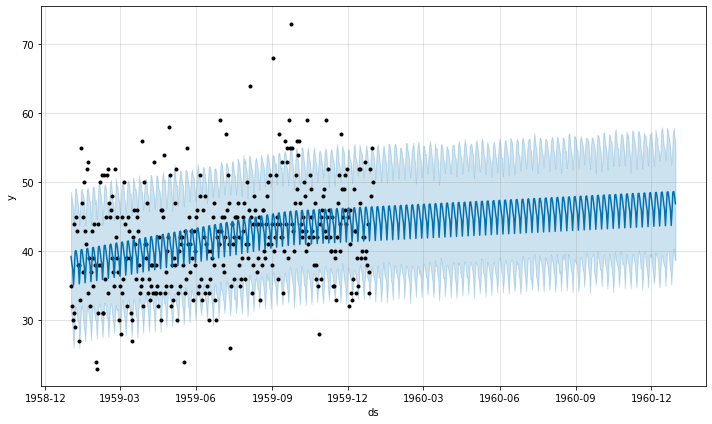

In [51]:
#Plotting the Predictions !
fig1 = m.plot(forecast)

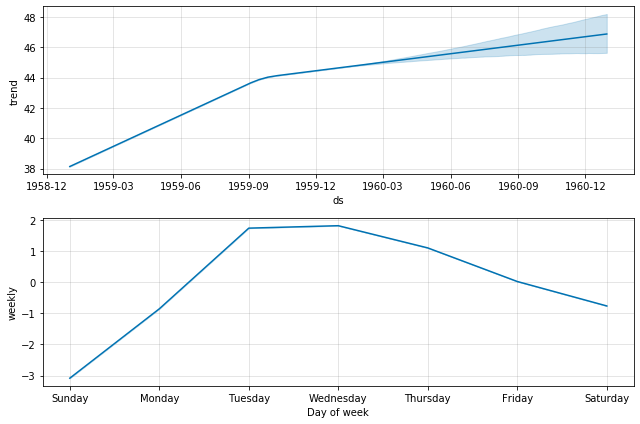

In [52]:
#Plotting the Seasonal Components
fig2=m.plot_components(forecast)
